In [1]:
# example of fitting a gaussian mixture model with expectation maximization
import numpy as np
from sklearn import mixture
from scipy import stats
from sklearn import model_selection
import pandas as pd

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# generate a sample
X1 = np.random.normal(loc=20, scale=5, size=3000)
X2 = np.random.normal(loc=40, scale=5, size=7000)
X = np.hstack((X1, X2))

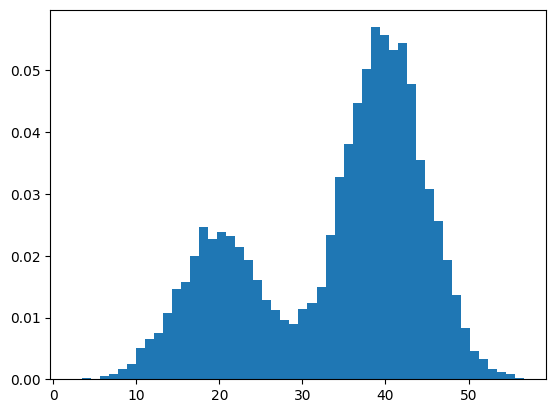

In [4]:
plt.hist(X, bins=50, density=True)
plt.show()

In [5]:
# reshape into a table with one column
X = X.reshape((len(X), 1))
# fit model
model = mixture.GaussianMixture(n_components=2, init_params="k-means++", max_iter=1000)
model.fit(X)

GaussianMixture(init_params='k-means++', max_iter=1000, n_components=2)

In [6]:
# predict latent values
yhat = model.predict(X)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [7]:
yhat_probs = model.predict_proba(X)
print(yhat_probs[:20])
print(yhat_probs[-20:])

[[1.43381515e-05 9.99985662e-01]
 [4.28650697e-04 9.99571349e-01]
 [2.01746513e-04 9.99798253e-01]
 [1.54162317e-06 9.99998458e-01]
 [8.41024833e-03 9.91589752e-01]
 [7.56765810e-08 9.99999924e-01]
 [2.11276664e-06 9.99997887e-01]
 [7.13372026e-08 9.99999929e-01]
 [4.78777077e-04 9.99521223e-01]
 [3.99757144e-03 9.96002429e-01]
 [1.55496880e-04 9.99844503e-01]
 [7.22037191e-05 9.99927796e-01]
 [1.88346945e-04 9.99811653e-01]
 [7.00078315e-04 9.99299922e-01]
 [2.35051646e-04 9.99764948e-01]
 [8.10218162e-02 9.18978184e-01]
 [3.67990726e-03 9.96320093e-01]
 [1.13977841e-02 9.88602216e-01]
 [9.82757551e-09 9.99999990e-01]
 [3.24330914e-03 9.96756691e-01]]
[[9.99999703e-01 2.96945768e-07]
 [9.99246845e-01 7.53154609e-04]
 [7.75500408e-01 2.24499592e-01]
 [9.99987024e-01 1.29759335e-05]
 [9.99893343e-01 1.06657184e-04]
 [9.99845900e-01 1.54099688e-04]
 [9.99998440e-01 1.55982708e-06]
 [9.44069648e-01 5.59303517e-02]
 [9.99520125e-01 4.79874960e-04]
 [9.90463994e-01 9.53600558e-03]
 [9.85034

In [8]:
# points in the left edge, "middle", right edge
model.predict_proba([[10], [20], [30], [40], [50]])

array([[4.88565218e-08, 9.99999951e-01],
       [3.79556695e-04, 9.99620443e-01],
       [5.98910838e-01, 4.01089162e-01],
       [9.99663572e-01, 3.36428009e-04],
       [9.99999666e-01, 3.34223437e-07]])

## Higher Dimensional Space

In [9]:
def mv_normal(mu, eigenvalues):
    dim = len(mu)
    # ortho matrix
    ortho_matrix = stats.ortho_group.rvs(dim)
    # cov matrix; dim x dim
    cov = np.matmul(ortho_matrix, np.matmul(np.diag(eigenvalues), ortho_matrix.T))
    return stats.multivariate_normal(mu, cov)

In [10]:
def high_dim_data(dim: int, num_samples: int):
    mu = [np.random.rand()*np.random.randint(1, 100) for _ in range(dim)]
    eigenvalues = [np.random.rand()*np.random.randint(1, 1000) for _ in range(dim)]
    normal_dist = mv_normal(mu=mu, eigenvalues=eigenvalues)
    return normal_dist.rvs(size=num_samples)    

In [11]:
def high_dim_mixture(X, num_components: int):
    # generate a sample
    # fit model
    model = mixture.GaussianMixture(
        n_components=num_components, init_params="k-means++", max_iter=1000
    )
    model.fit(X)
    return model

In [12]:
d50_X = high_dim_data(dim=50, num_samples=100_000)

In [13]:
d50_model = high_dim_mixture(d50_X, num_components=10)

In [14]:
d50_yhat = d50_model.predict_proba(d50_X)

In [15]:
# check latent value for first few points
print(d50_yhat[:20])
# check latent value for last few points
print(d50_yhat[-20:])

[[1.15853558e-02 1.91727933e-02 5.07294739e-02 8.40537650e-04
  2.23978326e-01 3.97583793e-02 2.83114198e-01 4.55267022e-03
  2.59126464e-05 3.66242353e-01]
 [2.18983424e-02 1.26815990e-01 1.77295867e-02 3.03507790e-03
  4.72175173e-01 4.61574287e-04 2.46826949e-01 8.55658176e-02
  1.21162212e-04 2.53703265e-02]
 [7.10126678e-05 1.39320297e-02 2.82352999e-01 1.48172835e-01
  9.23677895e-02 1.17276541e-04 2.85789966e-01 1.68419647e-01
  1.25791501e-03 7.51852859e-03]
 [2.12231420e-08 5.95505831e-02 2.38397347e-01 1.34397149e-03
  4.29817394e-02 1.37933003e-02 4.07769633e-02 3.19447753e-01
  1.52367620e-03 2.82184645e-01]
 [8.59385525e-02 2.32085509e-01 5.18424946e-02 3.37957378e-03
  2.31025926e-01 8.19860341e-02 2.65766332e-01 3.87213672e-02
  8.72397753e-05 9.16697109e-03]
 [5.94099991e-03 3.03732735e-02 1.21040827e-01 5.86392513e-02
  3.14452921e-01 1.33825419e-02 4.07665941e-01 4.41217825e-02
  1.45727741e-04 4.23673417e-03]
 [3.38034544e-03 9.47158898e-04 1.23436539e-01 2.57548825e

In [16]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

In [17]:
param_grid = {
    "n_components": (5, 10, 15),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = model_selection.GridSearchCV(
    mixture.GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(d50_X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': (5, 10, 15)},
             scoring=<function gmm_bic_score at 0x16a9dcea0>)

In [18]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score")

,Number of components,Type of covariance,BIC score
3,5,tied,7.669379e+06
4,10,tied,7.671987e+06
5,15,tied,7.674564e+06
9,5,full,7.721216e+06
10,10,full,7.789409e+06
11,15,full,7.858201e+06
8,15,diag,8.226743e+06
2,15,spherical,8.233412e+06
7,10,diag,8.234551e+06
1,10,spherical,8.243643e+06


/Users/guilherme/Code/research.phd/drmdp-fnapprox/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/guilherme/Code/research.phd/drmdp-fnapprox/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/guilherme/Code/research.phd/drmdp-fnapprox/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

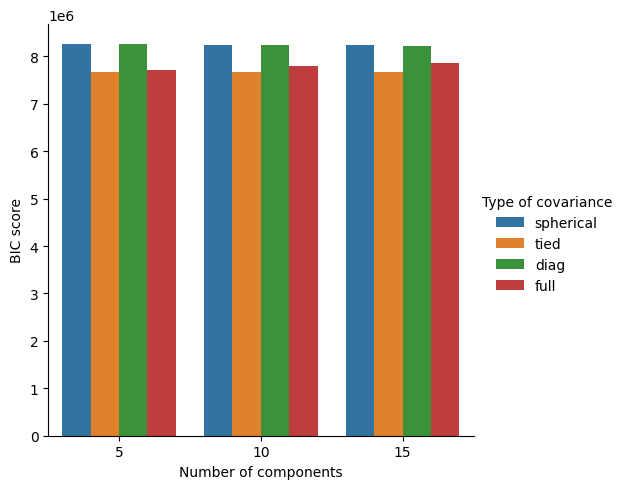

In [19]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()